## 파이선을 활용한 부동산 데이터 분석 - 박준규, 위키북스
* 무작정 따라하기

In [1]:
import pandas as pd
import xlwings as xw

# 1. 엑셀 파일 읽어오기

In [2]:
#월간 KB주택가격동향 파일을 다운받습니다.
# ★시계열 자료 2019년 10월 기준 (1986년 1월 부터)
# ■ 기간 : 1986년 1월 ~ 2019년 10월
# url = ('https://onland.kbstar.com/quics?page=C059744&cc=b061784:b061784&listPage=%2Fquics%3Fpage%3DC059744&boardId=741&compId=b061784&tableName=Q_BOARD_ARTICLE_0020&articleId=3883&bbsMode=view&isGuest=T&viewPage=1&searchCondition=title&viewRows=0&bbsAclCtlBit=null&writeActionTarget=https%3A%2F%2Fonland.kbstar.com%2Fquics%3Fasfilecode%3D534218&modifyActionTarget=https%3A%2F%2Fonland.kbstar.com%2Fquics%3Fasfilecode%3D534215&deleteActionTarget=https%3A%2F%2Fonland.kbstar.com%2Fquics%3Fasfilecode%3D534212&replyActionTarget=https%3A%2F%2Fonland.kbstar.com%2Fquics%3Fasfilecode%3D534217&recommandActionTarget=https%3A%2F%2Fonland.kbstar.com%2Fquics%3Fasfilecode%3D534216&recommandMailActionTarget=%2Fcommon%2Fjsp%2Fcbp%2Fbbs%2FrecommandMailSendProc.jsp&selectAnswerActionTarget=https%3A%2F%2Fonland.kbstar.com%2Fquics%3Fasfilecode%3D534204&imgdeleteActionTarget=https%3A%2F%2Fonland.kbstar.com%2Fquics%3Fasfilecode%3D534214&commActionTarget=https%3A%2F%2Fonland.kbstar.com%2Fquics%3Fasfilecode%3D534210&commPage=1&PAGE_SNS_BTN=Y&PAGE_PRINT_BTN=Y&QSL=F')


In [3]:
#경로 설정
path = r'C:\Users\한대연\아나콘다\Git Analysis\data\kb부동산_datasets\★(월간)KB주택가격동향_시계열(2019.10)35207955572647348.xlsx'
#xlwings를 이용해서 Book으로 경로 지정합니다.
wb = xw.Book(path)
#파일의 매매종합 시트를 지정합니다.
sheet = wb.sheets['매매종합']
#원하는 데이터는 갱신되어 날짜가 바뀔 때마다 행의 갯수가 변하므로 end.row를 이용해 행의 갯수를 반환하도록 합니다.
row_num = sheet.range(1, 1).end('down').end('down').end('down').row
#원하는 데이터의 범위 지정합니다.
data_range = 'A2:GE' + str(row_num)
#가져온 데이터를 df 변수에 담습니다.
df = sheet[data_range].options(pd.DataFrame, index = False, header = True).value

In [4]:
df.head()

,구분,전국,서울,강북,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,양산,거제,진주,김해,통영,제주도,제주/\n서귀포,기타지방
0,None,None,None,None,강북구,광진구,노원구,도봉구,동대문구,마포구,...,의창구,진해구,None,None,None,None,None,None,None,None
1,Classification,Total,Seoul,Northern seoul,Gangbuk-gu,Gwangjin-gu,Nowon-gu,Dobong-gu,Dongdaemun-gu,Mapo-gu,...,Uichang,Jinhae,Yangsan,Geoje,Jinju,Gimhae,Tongyoung,Jeju-do,Jeju/\nSeogwipo,Non-Metropolitan Area
2,86.1,34.6561,30.0438,41.94,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,2,34.6561,30.0438,41.8891,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,3,34.708,30.0024,41.8891,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


# 2. 데이터 전처리

In [5]:
#column 원소 파악
df.columns.unique()

Index([          '구분',           '전국',           '서울',           '강북',
                 None,           '강남',        '6개광역시',           '부산',
                 '대구',           '인천',           '광주',           '대전',
                 '울산', '5개광역시\n(인천外)',          '수도권',           '세종',
                 '경기',           '수원',           '성남',           '고양',
                 '안양',           '부천',          '의정부',           '광명',
                 '평택',           '안산',           '과천',           '구리',
                '남양주',           '용인',           '시흥',           '군포',
                 '의왕',           '하남',           '오산',           '파주',
                 '이천',           '안성',           '김포',           '양주',
                '동두천',           '화성',           '강원',           '춘천',
                 '원주',           '충북',           '청주',           '충주',
                 '제천',           '충남',           '천안',           '공주',
                 '아산',           '논산',           '계룡',           '당진',
      

In [6]:
#0번 row 원소 파악
df.iloc[0].unique()

array([None, '강북구', '광진구', '노원구', '도봉구', '동대문구', '마포구', '서대문구', '성동구',
       '성북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강남구', '강동구', '강서구',
       '관악구', '구로구', '금천구', '동작구', '서초구', '송파구', '양천구', '영등포구', '서구',
       '동구', '영도구', '부산진구', '동래구', '남구', '북구', '해운대구', '사하구', '금정구',
       '연제구', '수영구', '사상구', '기장군', '수성구', '달서구', '달성군', '미추홀구', '연수구',
       '남동구', '부평구', '계양구', '광산구', '유성구', '대덕구', '울주군', '장안구', '권선구',
       '팔달구', '영통구', '수정구', '중원구', '분당구', '덕양구', '일산동구', '일산서구', '만안구',
       '동안구', '단원구', '상록구', '처인구', '기흥구', '수지구', '강릉', '상당구', '서원구',
       '청원구', '흥덕구', '동남구', '서북구', '완산구', '덕진구', '마산합포구', '마산회원구', '성산구',
       '의창구', '진해구'], dtype=object)

In [7]:
#시-도 category는 column에 위치 , 구-군 category는 iloc 0번에 위치.
big_col = list(df.columns)
small_col = list(df.iloc[0])

In [8]:
# big col 부분은 '서울 대구 부산 대전 광주 인천 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주도'
# 와 같이 시 - 도 정보로만 이루어져 있어야 합니다.
# 이를 bigname 이란 변수에 저장하고 big col의 비어있는 부분을 채워줍니다.
bigname = '구분 전국 서울 6개광역시 부산 대구 인천 광주 대전 울산 5개광역시 수도권 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주도 기타지방'.split(" ")

In [9]:
#small col에서 none 값을 없애고 해당 big col값으로 대체합니다.
# enumerate 를 이용해 해당 값을 이어줍니다.
for num, gu_data in enumerate(small_col):
    if gu_data == None:
        small_col[num] = big_col[num]
        
    check = num
    while True:
        if big_col[check] in bigname:
            big_col[num] = big_col[check]
            break
        else:
            check -= 1
            
#경기도 광주와 그 뒤의 화성의 big column이 경기도로 인식되지 않는 부분을 확인하고
#직접 수정해줍니다.        
    if gu_data == '광주':
        print(num)
        print(big_col[num])
        print(small_col[num])
        
        print(num+1)
        print(big_col[num+1])
        print(small_col[num+1])

In [10]:
big_col[129] = '경기'
big_col[130] = '경기'

In [11]:
#추가로 서귀포컬럼의 이름도 clean 하게 수정해줍니다.
small_col[185] = '서귀포'

In [12]:
#전처리한 컬럼 - 데이터에 적용.
df.columns = [big_col, small_col]

In [13]:
# 불필요한 row 삭제.
df = df.drop([0,1])

In [14]:
print(df.shape)
df

(406, 187)


구분       전국       서울                                               \
       구분       전국       서울       강북      강북구      광진구      노원구      도봉구   
2    86.1  34.6561  30.0438    41.94     None     None     None     None   
3       2  34.6561  30.0438  41.8891     None     None     None     None   
4       3   34.708  30.0024  41.8891     None     None     None     None   
5       4  34.4486  29.8366  41.7366     None     None     None     None   
6       5  34.2929   29.588  41.2791     None     None     None     None   
..    ...      ...      ...      ...      ...      ...      ...      ...   
403     6  99.5385  100.037  100.254  100.865  99.8983  100.095  99.8762   
404     7  99.5314  100.302  100.521  101.004  100.212  100.442  100.074   
405     8  99.5861  100.682  101.017   102.99  100.668      101  100.224   
406     9  99.6396   101.06  101.292  103.051  100.877  101.222  100.438   
407    10  99.7334  101.432   101.53  103.091  101.267  101.366  100.562   

                       ...       경남                                         \
        동대문구      마포구  ...      의창구      진해구    양산    거제       진주       김해   
2       None     None  ...     None     None  None  None     None     None   
3       None     None  ...     None     None  None  None     None     None   
4       None     None  ...     None     None  None  None     None     None   
5       None     None  ...     None     None  None  None     None     None   
6       None     None  ...     None     None  None  None     None     None   
..       ...      ...  ...      ...      ...   ...   ...      ...      ...   
403  100.352  99.9908  ...  97.6907  99.0593  None  None  97.9095  96.9309   
404  100.723  100.317  ...   97.092  98.8455  None  None  97.4756   96.055   
405  100.984  100.979  ...   96.993  98.8204  None  None  98.4843  95.6924   
406  101.329  101.442  ...  96.7089  98.2978  None  None  98.1888  95.3363   
407  101.627  101.881  ...  96.4059   98.046  None  None  97.9575  94.8948   

            제주도              기타지방  
       통영   제주도      서귀포     기타지방  
2    None  None     None     None  
3    None  None     None     None  
4    None  None     None     None  
5    None  None     None     None  
6    None  None     None     None  
..    ...   ...      ...      ...  
403  None  None  99.1183  98.5402  
404  None  None  99.0396  98.2511  
405  None  None  99.0585  98.0999  
406  None  None  98.3358  97.9116  
407  None  None   97.879  97.7453  

[406 rows x 187 columns]

In [15]:
#86.1 은 1986년의 1월으 데이터 입니다.
#새로운 인덱스를 지정하기 위해 리스트를 설정해 줍니다.
#1986년1월 부터 2019년 10월 까지의 데이터
index_list = list(df['구분']['구분'])
index_list

[86.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 87.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 88.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 89.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 90.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 91.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 92.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 93.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 94.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 95.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 96.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 97.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 98.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 99.1,
 2.0,

In [16]:
#새롭게 인덱스로 지정할 빈 리스트를 만들어주고,
new_index = []
for i, cal in enumerate(index_list):
    # index_list의 원소를 .을 기준으로 나눠서 temp라는 변수로 씌워줍니다.
    # 86.1 은 86과 1로 나뉘어 저장되고, 2는 2로 저장이 됩니다.
    temp = str(cal).split('.')
    #temp의 첫 원소가 '년' 데이터인지 '월' 데이터인지 확인해서 '년.월'의 형태로 
    # new_index에 새로 저장해줍니다.
    if int(temp[0]) > 12:
        if len(temp[0]) == 2:
            new_index.append('19' + temp[0] + '.' + temp[1])
        else:
            new_index.append(temp[0] + '.' + temp[1])
    else:
        new_index.append(new_index[i-1].split('.')[0] + '.' + temp[0])

In [17]:
new_index[:5]

['1986.1', '1986.2', '1986.3', '1986.4', '1986.5']

In [18]:
#새로 만든 리스트를 인덱스에 적용시켜줍니다.
df.set_index(pd.to_datetime(new_index), inplace = True)
#인덱스를 지정해줬으니 구분탭을 삭제해줍니다.
newdf = df.drop(('구분', '구분'), axis = 1)

In [19]:
newdf.head()

전국       서울                                               \
                 전국       서울       강북   강북구   광진구   노원구   도봉구  동대문구   마포구   
1986-01-01  34.6561  30.0438    41.94  None  None  None  None  None  None   
1986-02-01  34.6561  30.0438  41.8891  None  None  None  None  None  None   
1986-03-01   34.708  30.0024  41.8891  None  None  None  None  None  None   
1986-04-01  34.4486  29.8366  41.7366  None  None  None  None  None  None   
1986-05-01  34.2929   29.588  41.2791  None  None  None  None  None  None   

                  ...    경남                                       제주도        \
            서대문구  ...   의창구   진해구    양산    거제    진주    김해    통영   제주도   서귀포   
1986-01-01  None  ...  None  None  None  None  None  None  None  None  None   
1986-02-01  None  ...  None  None  None  None  None  None  None  None  None   
1986-03-01  None  ...  None  None  None  None  None  None  None  None  None   
1986-04-01  None  ...  None  None  None  None  None  None  None  None  None   
1986-05-01  None  ...  None  None  None  None  None  None  None  None  None   

            기타지방  
            기타지방  
1986-01-01  None  
1986-02-01  None  
1986-03-01  None  
1986-04-01  None  
1986-05-01  None  

[5 rows x 186 columns]

In [20]:
#전처리 과정을 전부 함수로 만들어 다른 시트에도 쉽게 적용시킬 수 있습니다.
def KBprice_processing(path, data_type):
    # path : 엑셀 파일 dir
    # data_type : 엑셀파일의 각 시트이름
    #sheet_list = ('매매종합 매매APT 매매연립 매매단독 전세종합 전세APT 전세연립 전세단독').split(' ')
    
    wb = xw.Book(path)
    sheet = wb.sheets[data_type]
    row_num = sheet.range(1, 1).end('down').end('down').end('down').row
    data_range = 'A2:GE' + str(row_num)
    raw_data = sheet[data_range].options(pd.DataFrame, index = False, header = True).value
    
    bigname = '구분 전국 서울 6개광역시 부산 대구 인천 광주 대전 울산 5개광역시 수도권 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주도 기타지방'.split(" ")
    big_col = list(raw_data.columns)
    small_col = list(raw_data.iloc[0])
    
    for num, gu_data in enumerate(small_col):
        if gu_data == None:
            small_col[num] = big_col[num]

        check = num
        while True:
            if big_col[check] in bigname:
                big_col[num] = big_col[check]
                break
            else:
                check -= 1
                
    big_col[129] = '경기'
    big_col[130] = '경기'
    small_col[185] = '서귀포'
    
    raw_data.columns = [big_col, small_col]
    new_col_data = raw_data.drop([0, 1])
    
    index_list = list(new_col_data['구분']['구분'])
    
    new_index = []
    
    for i, cal in enumerate(index_list):
        temp = str(cal).split('.')
        if int(temp[0]) > 12:
            if len(temp[0]) == 2:
                new_index.append('19' + temp[0] + '.' + temp[1])
            else:
                new_index.append(temp[0] + '.' + temp[1])
        else:
            new_index.append(new_index[i-1].split('.')[0] + '.' + temp[0])
        
    new_col_data.set_index(pd.to_datetime(new_index), inplace = True)
    cleaned_data = new_col_data.drop(('구분', '구분'), axis = 1)
    return cleaned_data

In [21]:
KBprice_processing(r'C:\Users\한대연\아나콘다\Git Analysis\data\kb부동산_datasets\★(월간)KB주택가격동향_시계열(2019.10)35207955572647348.xlsx', '매매종합')

전국       서울                                               \
                 전국       서울       강북      강북구      광진구      노원구      도봉구   
1986-01-01  34.6561  30.0438    41.94     None     None     None     None   
1986-02-01  34.6561  30.0438  41.8891     None     None     None     None   
1986-03-01   34.708  30.0024  41.8891     None     None     None     None   
1986-04-01  34.4486  29.8366  41.7366     None     None     None     None   
1986-05-01  34.2929   29.588  41.2791     None     None     None     None   
...             ...      ...      ...      ...      ...      ...      ...   
2019-06-01  99.5385  100.037  100.254  100.865  99.8983  100.095  99.8762   
2019-07-01  99.5314  100.302  100.521  101.004  100.212  100.442  100.074   
2019-08-01  99.5861  100.682  101.017   102.99  100.668      101  100.224   
2019-09-01  99.6396   101.06  101.292  103.051  100.877  101.222  100.438   
2019-10-01  99.7334  101.432   101.53  103.091  101.267  101.366  100.562   

                                       ...       경남                       \
               동대문구      마포구     서대문구  ...      의창구      진해구    양산    거제   
1986-01-01     None     None     None  ...     None     None  None  None   
1986-02-01     None     None     None  ...     None     None  None  None   
1986-03-01     None     None     None  ...     None     None  None  None   
1986-04-01     None     None     None  ...     None     None  None  None   
1986-05-01     None     None     None  ...     None     None  None  None   
...             ...      ...      ...  ...      ...      ...   ...   ...   
2019-06-01  100.352  99.9908  101.142  ...  97.6907  99.0593  None  None   
2019-07-01  100.723  100.317  101.636  ...   97.092  98.8455  None  None   
2019-08-01  100.984  100.979  102.367  ...   96.993  98.8204  None  None   
2019-09-01  101.329  101.442  102.674  ...  96.7089  98.2978  None  None   
2019-10-01  101.627  101.881  102.845  ...  96.4059   98.046  None  None   

                                     제주도              기타지방  
                 진주       김해    통영   제주도      서귀포     기타지방  
1986-01-01     None     None  None  None     None     None  
1986-02-01     None     None  None  None     None     None  
1986-03-01     None     None  None  None     None     None  
1986-04-01     None     None  None  None     None     None  
1986-05-01     None     None  None  None     None     None  
...             ...      ...   ...   ...      ...      ...  
2019-06-01  97.9095  96.9309  None  None  99.1183  98.5402  
2019-07-01  97.4756   96.055  None  None  99.0396  98.2511  
2019-08-01  98.4843  95.6924  None  None  99.0585  98.0999  
2019-09-01  98.1888  95.3363  None  None  98.3358  97.9116  
2019-10-01  97.9575  94.8948  None  None   97.879  97.7453  

[406 rows x 186 columns]

# 3. 데이터 시각화

In [45]:
#라이브러리를 import 해줍니다.
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline
from IPython.display import set_matplotlib_formats


rc('font', family='Malgun Gothic')
rc('axes', unicode_minus=False)
# plt.rcParams['axes.unicode_minus'] = False
set_matplotlib_formats('retina')




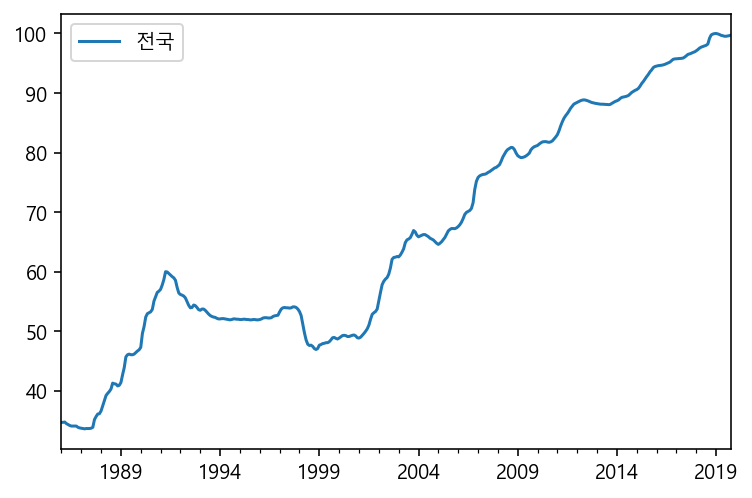

In [46]:
path = r'C:\Users\한대연\아나콘다\Git Analysis\data\kb부동산_datasets\★(월간)KB주택가격동향_시계열(2019.10)35207955572647348.xlsx'
data_type = '매매종합'
new_data = KBprice_processing(r'C:\Users\한대연\아나콘다\Git Analysis\data\kb부동산_datasets\★(월간)KB주택가격동향_시계열(2019.10)35207955572647348.xlsx', '매매종합')

new_data['전국']['전국'].plot(legend='전국')
plt.show()

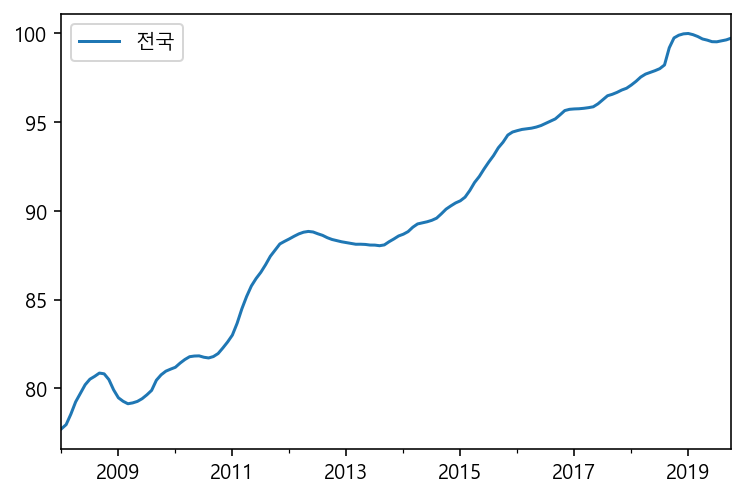

In [47]:
new_data['전국']['전국']['2008-01':].plot(legend='전국')
plt.show()

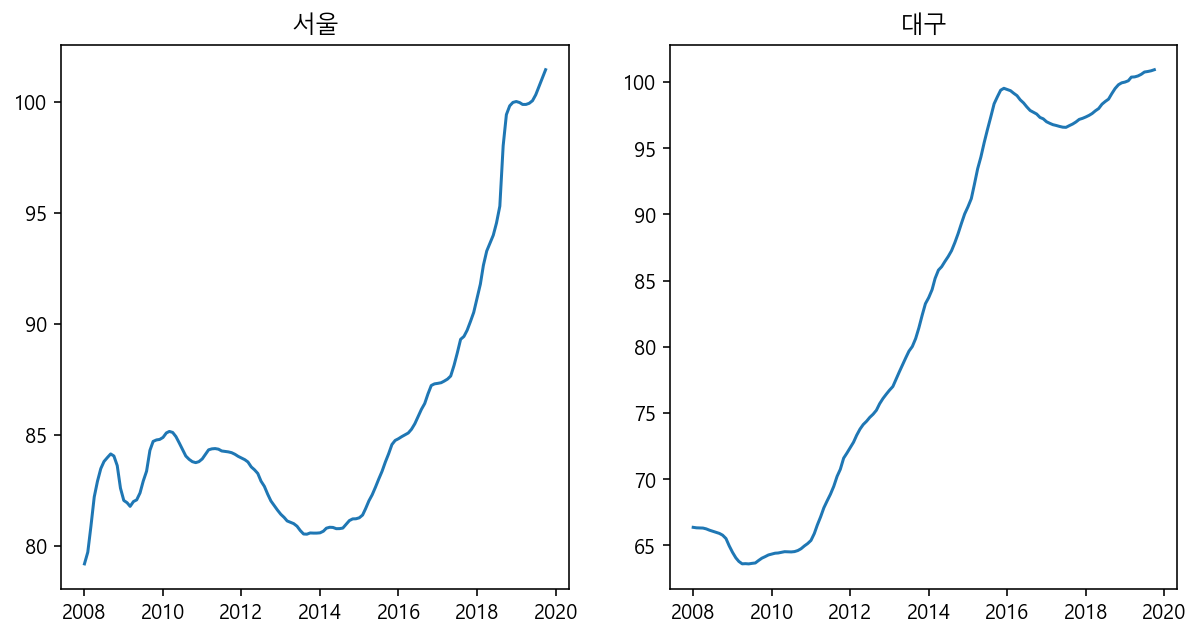

In [100]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)#('행 갯수', '열 갯수', '몇번째 위치')
plt.title('서울')
plt.plot(new_data['서울']['서울']['2008-01':])

plt.subplot(1,2,2)
plt.title('대구')
plt.plot(new_data['대구']['대구']['2008-01':])

plt.show()

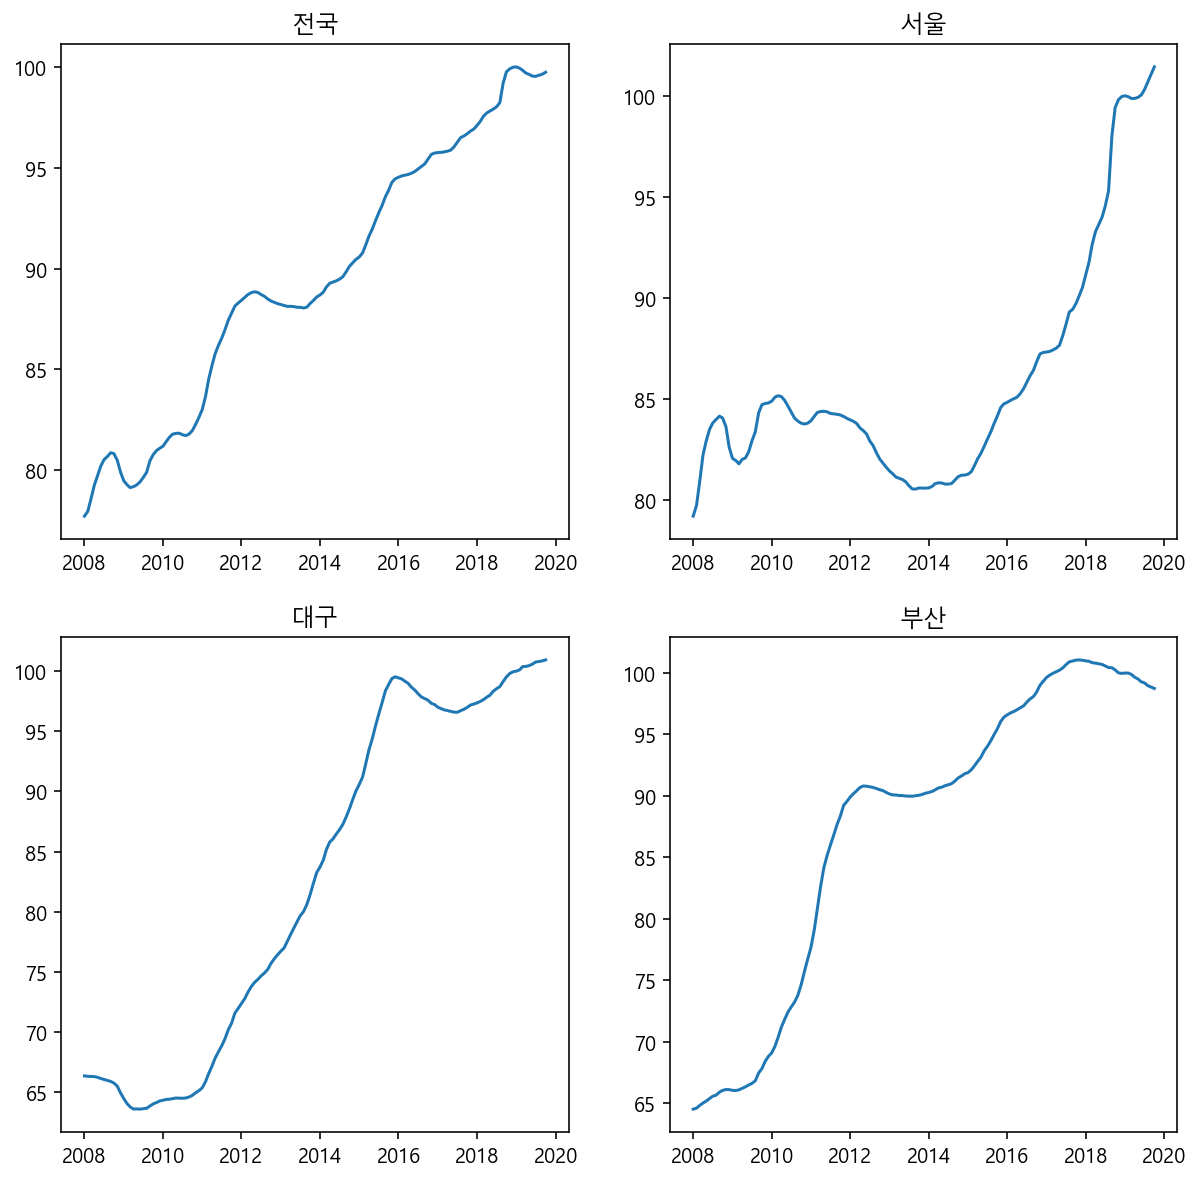

In [106]:
spots = '전국 서울 대구 부산'
start_date = '2008-1'
spot_list = spots.split(' ')
num_row = int((len(spot_list)-1)/2)+1

plt.figure(figsize=(10, num_row*5))
for i, spot in enumerate(spot_list):
    plt.subplot(num_row, 2, i+1)
    plt.title(spot)
    plt.plot(new_data[spot][spot][start_date:])
    
plt.show()

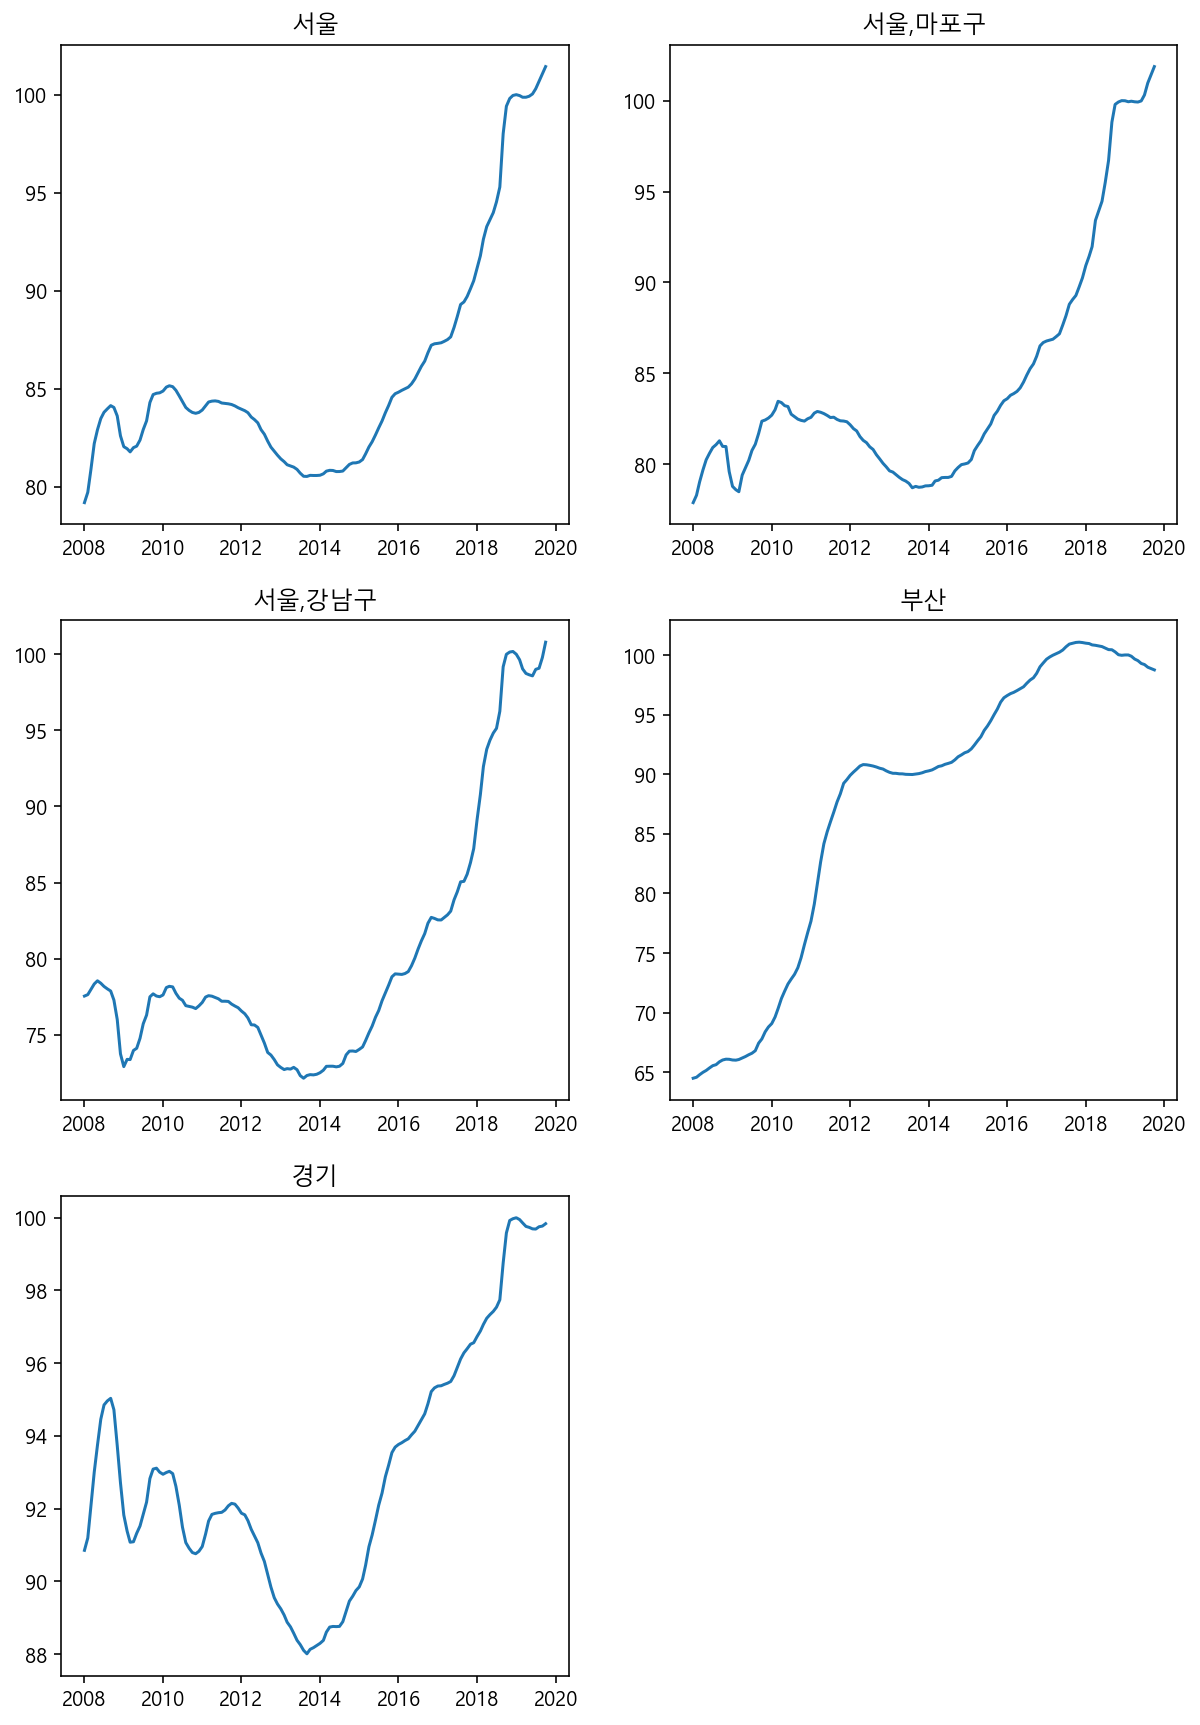

In [107]:
spots = '서울 서울,마포구 서울,강남구 부산 경기'
spot_list = spots.split(' ')
num_row = int((len(spot_list)-1)/2)+1

plt.figure(figsize=(10, num_row*5))
for i, spot in enumerate(spot_list):
    plt.subplot(num_row, 2, i+1)
    plt.title(spot)
    if ',' in spot:
        si, gu = spot.split(',')
    else:
        si = gu = spot
    plt.plot(new_data[si][gu][start_date:])

plt.show()

In [115]:
#증감률
diff = ((new_data.loc['2018-1-1'] - new_data.loc['2016-1-1']) / new_data.loc['2016-1-1'] * 100).dropna()

print("하위 10개")
print(diff.sort_values()[:10])
print(' ')
print('상위 10개')
print(diff.sort_values(ascending=False)[:10])

하위 10개
경남  성산구   -10.5885
경북  구미    -7.29792
경남  의창구   -6.39471
    창원    -5.33845
경북  북구    -5.08298
경남  진해구   -4.97543
경북  경북    -4.95762
울산  동구    -4.59458
충북  상당구   -4.47669
울산  북구    -4.45814
dtype: object
 
상위 10개
서울  강남구     12.8312
경기  분당구     11.0664
서울  서초구     10.3545
    송파구     10.2294
    영등포구    10.1712
    성동구     9.57512
    강동구     9.07697
    마포구     8.76415
    강남      8.61713
    양천구     8.28218
dtype: object


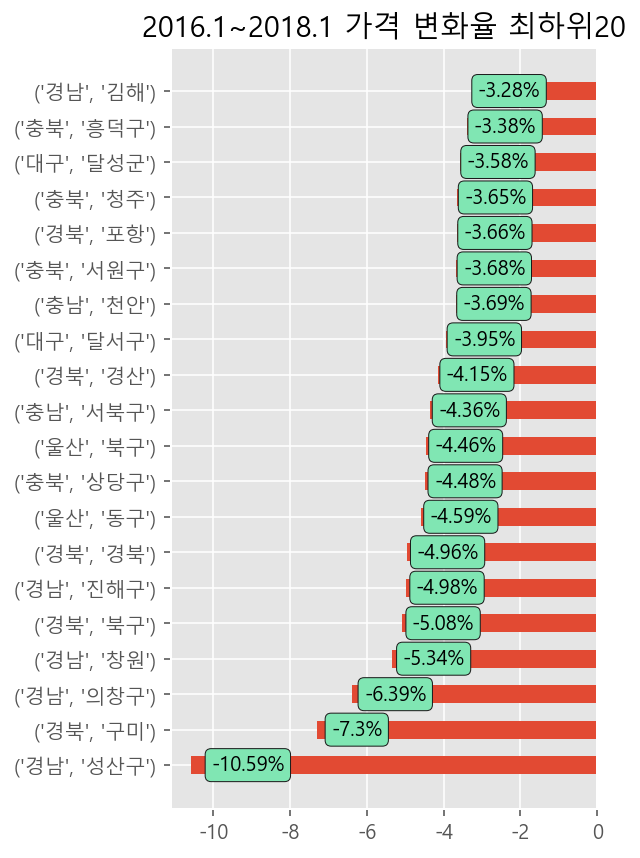

In [116]:
import numpy as np
from matplotlib import style
style.use('ggplot')

fig = plt.figure(figsize=(13,7))
ind = np.arange(20)

ax = fig.add_subplot(1,3,1)
plt.title('2016.1~2018.1 가격 변화율 최하위20')
rects = plt.barh(ind, diff.sort_values()[:20].values, align='center', height=0.5)
plt.yticks(ind, diff.sort_values()[:20].index)
for i, rect in enumerate(rects):
    ax.text(0.95 * rect.get_width(),
           rect.get_y() + rect.get_height() / 2.0,
           str(round(diff.sort_values()[:20].values[i],2)) + '%',
           ha='left', va='center', bbox = dict(boxstyle='round', fc=(0.5, 0.9, 0.7), ec="0.1"))

plt.show()